In [1]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# seaborn
import seaborn as sns
sns.set_style("whitegrid")

# matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

# Data Imputation
import import_ipynb
import Imputing_Missing_Data
import Encoding

# LightGBM
import lightgbm as lgb

# Encoding and Normalizing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split, GridSearchCV

# metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# GBM Classifier
from sklearn.ensemble import GradientBoostingClassifier

importing Jupyter notebook from Imputing_Missing_Data.ipynb
importing Jupyter notebook from Encoding.ipynb


In [2]:
datafile = 'C:/Projects/DataScienceProject/application_train.csv'
data1 = pd.read_csv(datafile)
df = pd.DataFrame(data1)
data = df.copy()
Imputed_Data = Imputing_Missing_Data.Imputing_data(data)

There are no any duplications in the dataset...
Missing Data Imputation has been finished!


In [3]:
X = Imputed_Data.drop(columns = ['SK_ID_CURR', 'TARGET'], axis = 1)
y = Imputed_Data['TARGET']

In [4]:
EncodedData = Encoding.Encoding_Data(X)

The column of NAME_CONTRACT_TYPE is encoding...
The column of CODE_GENDER is encoding...
The column of FLAG_OWN_CAR is encoding...
The column of FLAG_OWN_REALTY is encoding...
The column of NAME_TYPE_SUITE is encoding...
The column of NAME_INCOME_TYPE is encoding...
The column of NAME_EDUCATION_TYPE is encoding...
The column of NAME_FAMILY_STATUS is encoding...
The column of NAME_HOUSING_TYPE is encoding...
The column of OCCUPATION_TYPE is encoding...
The column of WEEKDAY_APPR_PROCESS_START is encoding...
The column of ORGANIZATION_TYPE is encoding...
The column of FONDKAPREMONT_MODE is encoding...
The column of HOUSETYPE_MODE is encoding...
The column of WALLSMATERIAL_MODE is encoding...
The column of EMERGENCYSTATE_MODE is encoding...
16 columns were label encoded


In [5]:
EncodedData.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,...,1,0,0,1,0,0,0,0,0,0
2,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,...,1,0,0,0,0,0,0,1,0,0


In [6]:
X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val = Encoding.scale_split(EncodedData, y, 0.2, 0.2)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
Encoding.ipynb:11: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  "\n",
Encoding.ipynb:12: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  "# Encoding\n",
Encoding.ipynb:13: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  "from sklearn.preprocessing import LabelEncoder, StandardScaler\n",


In [7]:
lgb_train = lgb.Dataset(X_train_scaled, label = y_train, feature_name = list(EncodedData.columns.astype(str)))

In [8]:
lgb_val = lgb.Dataset(X_val_scaled, label = y_val, reference = lgb_train, feature_name = list(EncodedData.columns.astype(str)))

In [9]:
params = {
    'learning_rate': 0.003,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'sub_feature': 0.5,
    'num_leaves': 64,
    'min_data': 50,
    'max_depth': 25
}

In [10]:
clf = lgb.train(params, lgb_train, 700, verbose_eval = 4)

Overall accuracy of Light GBM model: 0.8869648635025934


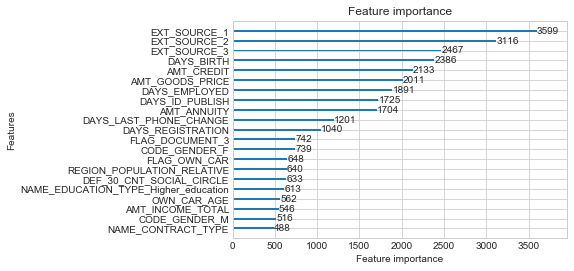

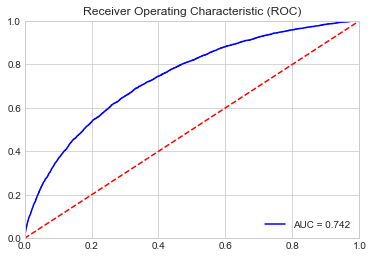

AUC score: 0.7421814650635551


<Figure size 432x288 with 0 Axes>

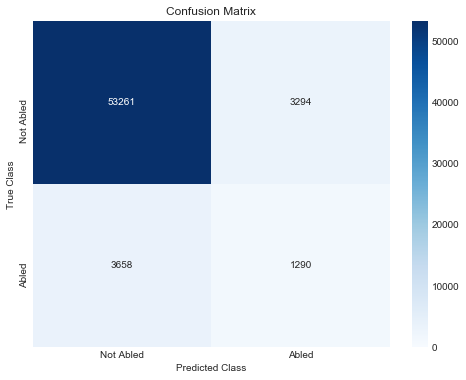

In [11]:
predictions_prob = clf.predict(X_test_scaled)
predictions_binary = np.where(predictions_prob > 0.165, 1, 0)

lgb.plot_importance(clf, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_binary)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_binary)
labels = ['Not Abled', 'Abled']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
